/tmp/ipykernel_208557/3608405262.py:58: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(group_data['PC1'], group_data['PC2'],
/tmp/ipykernel_208557/3608405262.py:58: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(group_data['PC1'], group_data['PC2'],
/tmp/ipykernel_208557/3608405262.py:58: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(group_data['PC1'], group_data['PC2'],
/tmp/ipykernel_208557/3608405262.py:58: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('|').  Matplotlib is ign

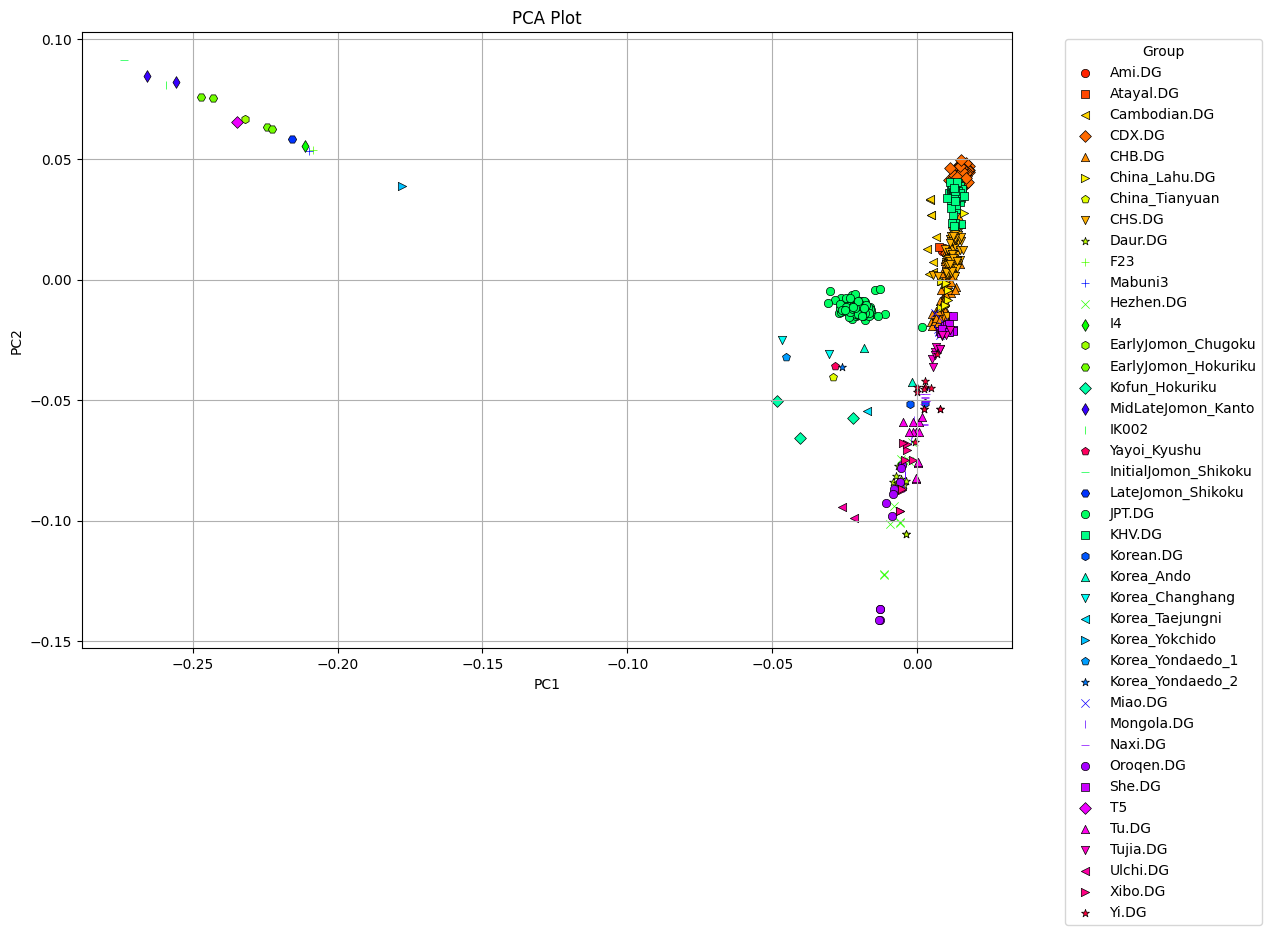

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# ファイルパス
file_path = '/home/mkato/hdd_data/data/1-withAADR/1-1-pca/present_and_ancient.evec.txt'

# ファイルを読み込み、各行のカラム数を揃えるために処理
with open(file_path, 'r') as f:
    lines = f.readlines()

# ヘッダー行を除外
lines = lines[1:]

# データを格納するリスト
data_list = []

# 各行を処理
for line in lines:
    # 行を空白で分割し、リストとして保存
    row = line.split()
    # data_list に追加
    data_list.append(row)

# データフレームに変換
data = pd.DataFrame(data_list)

# 列名を設定（Population列と最初の10個のPC列のみ）
columns = ['Population'] + [f'PC{i}' for i in range(1, 4)]
data = data.iloc[:, :4]  # 最初の11列のみを選択
data.columns = columns
# 除外する集団名を指定
exclude_populations = ['JJJ','Mongolia','Japan_Nagabaka','China_Xinjiang', 'Korea_ThreeKingdoms.SG']  # ここに除外したい集団名を追加

# 指定された集団を除外
data = data[~data['Population'].str.split(':').str[0].isin(exclude_populations)]

# 数値データに変換
for i in range(1, 4):
    data[f'PC{i}'] = pd.to_numeric(data[f'PC{i}'])

# 集団名を抽出
data['Group'] = data['Population'].apply(lambda x: x.split(':')[0])

# カテゴリカル変数をエンコード
le = LabelEncoder()
data['Group_encoded'] = le.fit_transform(data['Group'])

# グループごとに色とマーカーを設定
palette = sns.color_palette("hsv", len(data['Group'].unique()))
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'd', '|', '_']

# プロット
plt.figure(figsize=(12, 8))
for group in data['Group'].unique():
    group_data = data[data['Group'] == group]
    plt.scatter(group_data['PC1'], group_data['PC2'], 
                color=palette[le.transform([group])[0]], 
                marker=markers[le.transform([group])[0] % len(markers)], 
                edgecolors='black',
                linewidths=0.5,
                label=group)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot')
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)


plt.savefig('fig1.png')
plt.show()

/tmp/ipykernel_208557/1533670711.py:5: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(group_data['PC1'], group_data['PC3'],
/tmp/ipykernel_208557/1533670711.py:5: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(group_data['PC1'], group_data['PC3'],
/tmp/ipykernel_208557/1533670711.py:5: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(group_data['PC1'], group_data['PC3'],
/tmp/ipykernel_208557/1533670711.py:5: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('|').  Matplotlib is ignorin

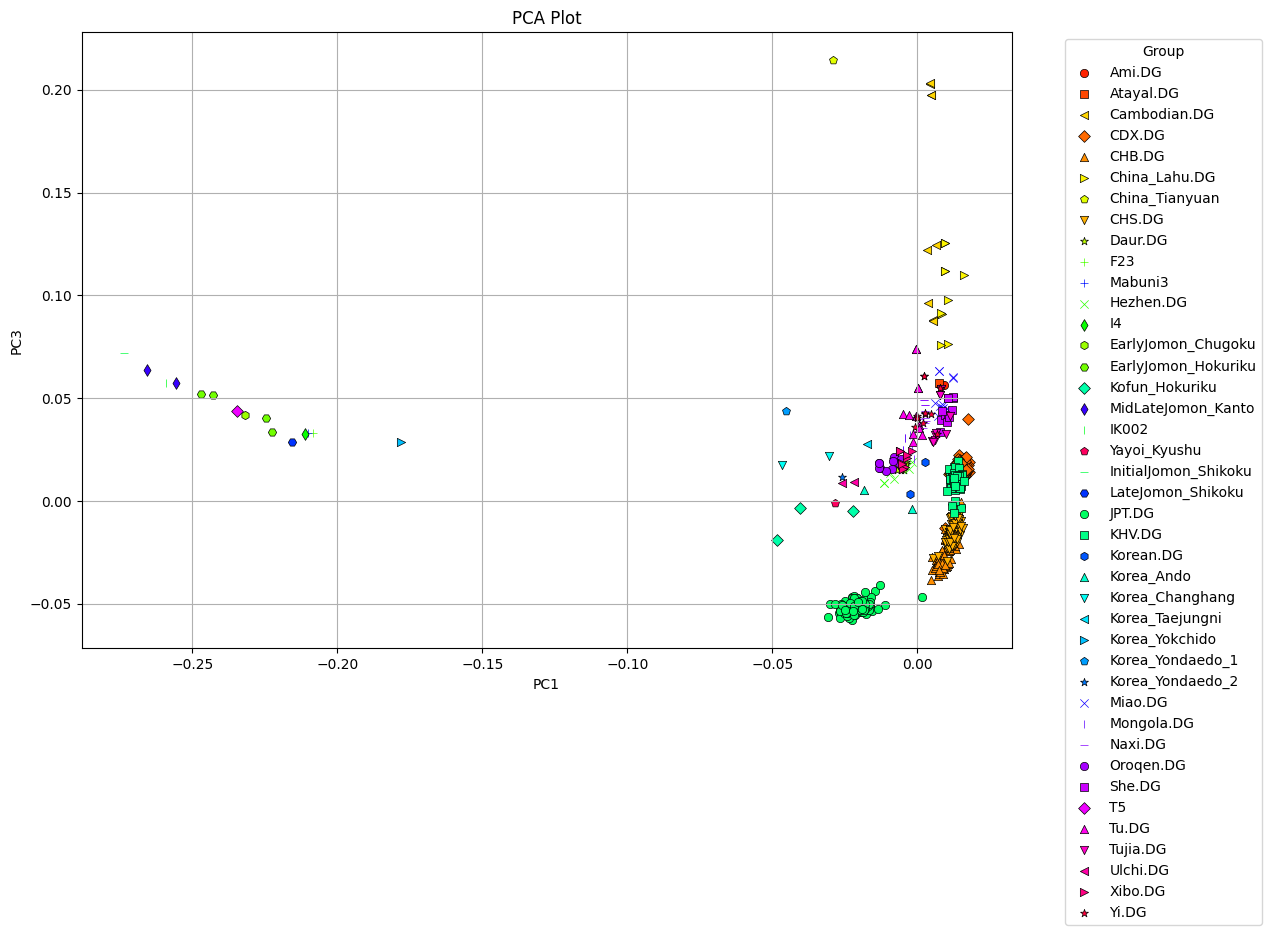

In [64]:
# プロット
plt.figure(figsize=(12, 8))
for group in data['Group'].unique():
    group_data = data[data['Group'] == group]
    plt.scatter(group_data['PC1'], group_data['PC3'], 
                color=palette[le.transform([group])[0]], 
                marker=markers[le.transform([group])[0] % len(markers)], 
                edgecolors='black',
                linewidths=0.5,
                label=group)

plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('PCA Plot')
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.savefig('fig.png')
plt.show()


/tmp/ipykernel_208557/3203442455.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  pca_df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=columns)


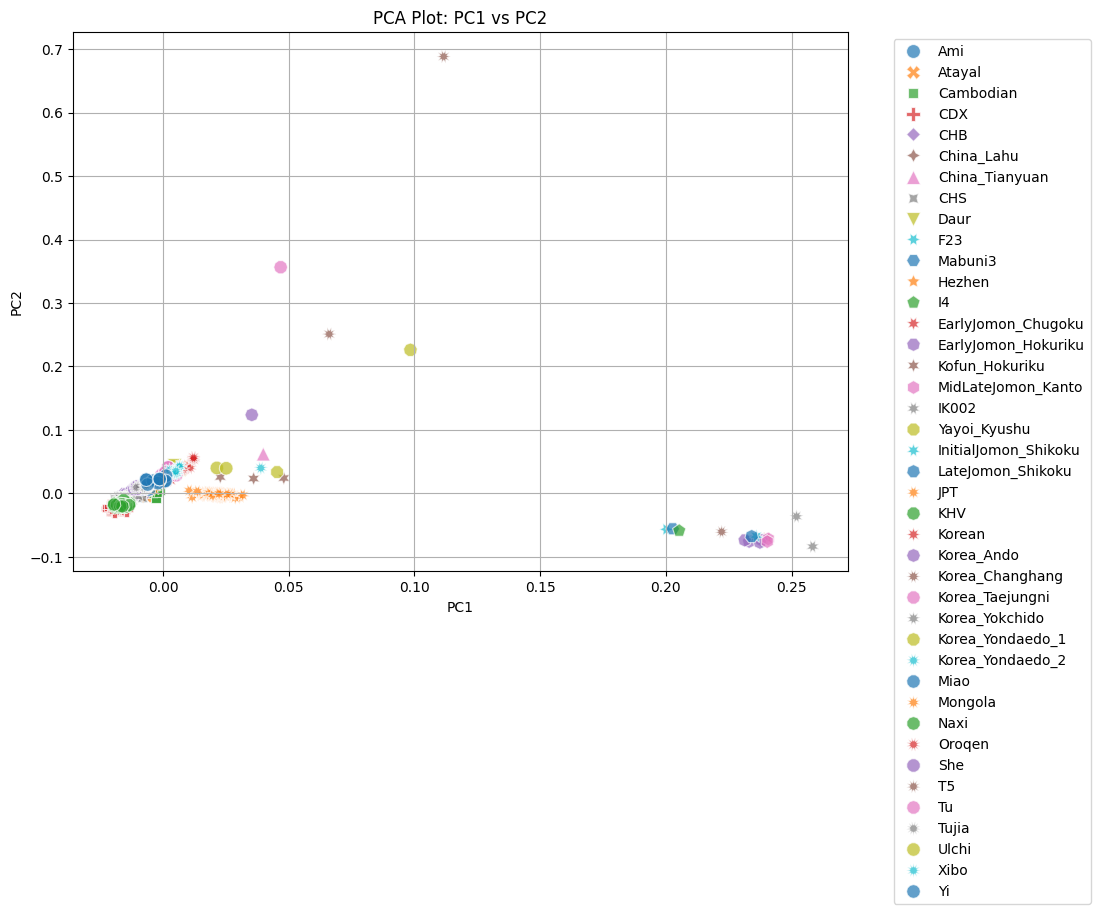

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# ファイルパスの設定
file_path = '/home/mkato/hdd_data/data/AADR/ancient_for_pca/merged/plink_pca.eigenvec'

# .eigenvecファイルを読み込む
columns = ['FamilyID', 'IndividualID'] + [f'PC{i}' for i in range(1, 21)]
pca_df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=columns)

# 集団名をFamilyIDから取得
pca_df['Population'] = pca_df['FamilyID'].apply(lambda x: x.split('.')[0])

# 集団ごとに色と形を分けてPCAプロットを作成する関数
def plot_pca_grouped(df, pc_x=1, pc_y=2):
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df, x=f'PC{pc_x}', y=f'PC{pc_y}', hue='Population', style='Population', palette='tab10', s=100, alpha=0.7)
    plt.xlabel(f'PC{pc_x}')
    plt.ylabel(f'PC{pc_y}')
    plt.title(f'PCA Plot: PC{pc_x} vs PC{pc_y}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

# PC1 vs PC2 のプロットを作成
plot_pca_grouped(pca_df, pc_x=1, pc_y=2)